# Handwritten digits classification using neural network
### In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

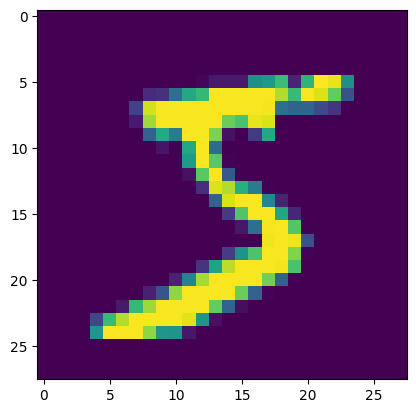

In [22]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train[1].shape
# plt.imshow(x_train[0])
# y_train[1]
# len(x_train)

In [23]:
x_train = x_train / 255
x_test = x_test / 255

In [25]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [30]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_train_flattened.shape
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 916us/step - loss: 0.4720 - accuracy: 0.8765
Epoch 2/8
1875/1875 [==============================] - 2s 883us/step - loss: 0.3045 - accuracy: 0.9150
Epoch 3/8
1875/1875 [==============================] - 2s 945us/step - loss: 0.2840 - accuracy: 0.9201
Epoch 4/8
1875/1875 [==============================] - 2s 907us/step - loss: 0.2738 - accuracy: 0.9228
Epoch 5/8
1875/1875 [==============================] - 2s 947us/step - loss: 0.2673 - accuracy: 0.9252
Epoch 6/8
1875/1875 [==============================] - 2s 931us/step - loss: 0.2622 - accuracy: 0.9270
Epoch 7/8
1875/1875 [==============================] - 2s 904us/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/8
1875/1875 [==============================] - 2s 987us/step - loss: 0.2553 - accuracy: 0.9293


In [37]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 872us/step - loss: 0.2722 - accuracy: 0.9240


[0.27216285467147827, 0.9240000247955322]

In [39]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 737us/step


array([7.43804825e-03, 4.46309159e-08, 2.39100736e-02, 9.72205102e-01,
       1.97654916e-03, 1.47496298e-01, 2.14902173e-07, 9.99812543e-01,
       1.10516824e-01, 5.95357716e-01], dtype=float32)

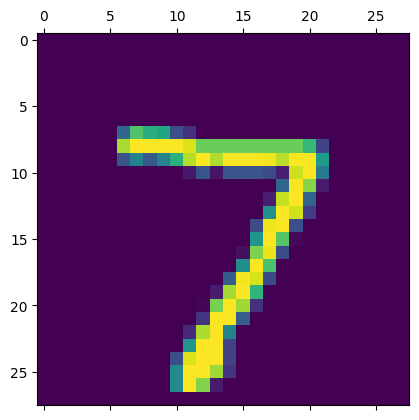

In [41]:
plt.matshow(x_test[0])


np.argmax finds a maximum element from an array and returns the index of it

In [42]:
np.argmax(y_predicted[0])


7

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    0,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,    8,  902,   16,   12,    4,   14,   12,   54,    3],
       [   3,    0,   11,  919,    1,   22,    4,    9,   35,    6],
       [   1,    1,    2,    2,  924,    0,   12,    3,   11,   26],
       [   9,    2,    1,   39,   10,  755,   17,    6,   46,    7],
       [   9,    3,    4,    1,    7,   10,  918,    2,    4,    0],
       [   1,    6,   19,    9,   10,    2,    0,  948,    3,   30],
       [   6,    5,    5,   16,    9,   18,    9,    7,  895,    4],
       [   9,    6,    1,   10,   34,    5,    0,   19,   17,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

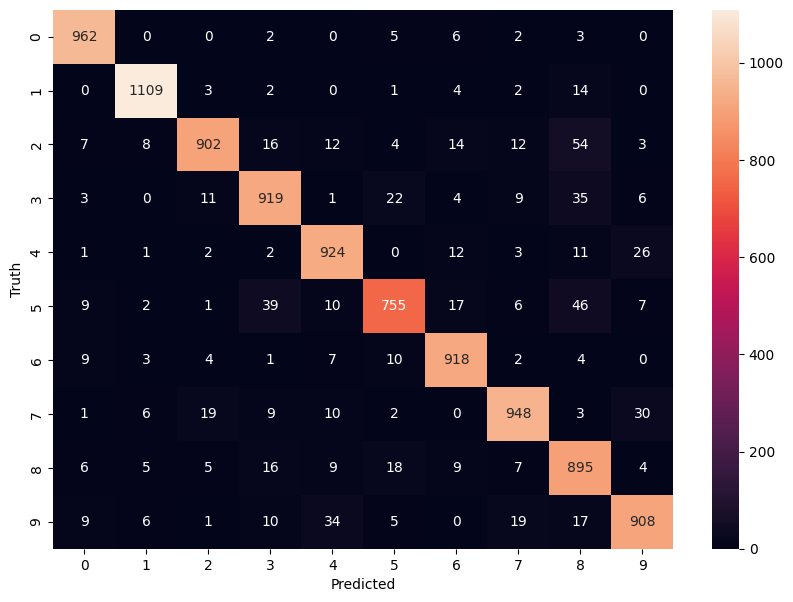

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using hidden layer

In [51]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(200, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)
model.evaluate(x_test_flattened,y_test)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2153 - accuracy: 0.9351
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0810 - accuracy: 0.9743
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0529 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0367 - accuracy: 0.9884
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0634 - accuracy: 0.9811


[0.06337147206068039, 0.9811000227928162]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

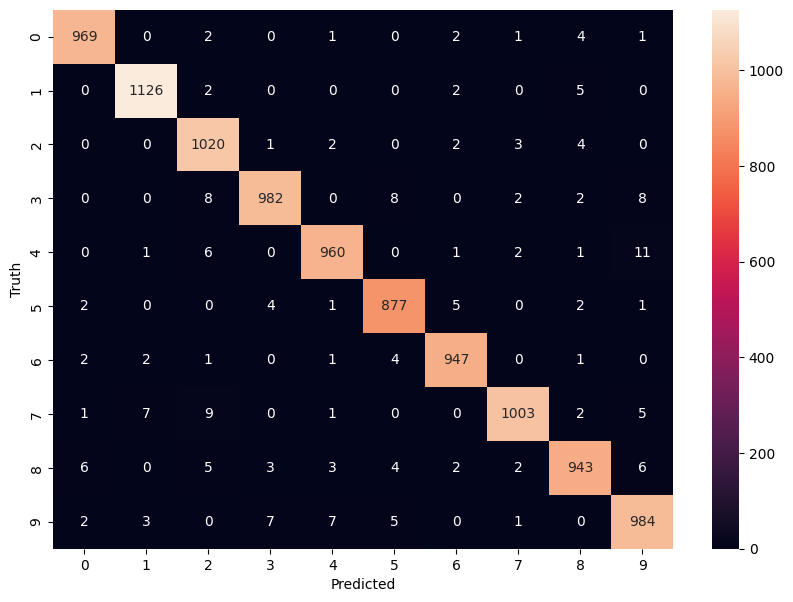

In [52]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9772


[0.08814339339733124, 0.9771999716758728]